In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from keras.models import load_model

In [9]:
#reading csv file

headers_name = ['First_Term_Gpa','Second_Term_Gpa', 'First_Language', 'Funding', 'School', 'FastTrack', 'Coop','Residency','Gender','Previous_Education','Age_Group','High_School_Average_Mark','Math_Score','English_Grade','First_Year_Persistence']
df = pd.read_csv('Student data.csv', names=headers_name) 
df.head(50)



,First_Term_Gpa,Second_Term_Gpa,First_Language,Funding,School,FastTrack,Coop,Residency,Gender,Previous_Education,Age_Group,High_School_Average_Mark,Math_Score,English_Grade,First_Year_Persistence
0,Student Data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Independent variables,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,First Term Gpa' numeric,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Second Term Gpa' numeric,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,First Language' numeric,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Funding numeric,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,School numeric,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,FastTrack numeric,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Coop numeric,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Residency numeric,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
#dropping the first 23 rows
df.drop(df.index[:24], inplace=True)
df.head(10)


,First_Term_Gpa,Second_Term_Gpa,First_Language,Funding,School,FastTrack,Coop,Residency,Gender,Previous_Education,Age_Group,High_School_Average_Mark,Math_Score,English_Grade,First_Year_Persistence
24,0,0,1,2.0,6.0,2.0,1.0,1.0,2.0,1,1,59,16,7,1.0
25,2.5,2,3,4.0,6.0,1.0,2.0,2.0,2.0,1,3,?,?,7,1.0
26,4.25,3.923077,1,1.0,6.0,2.0,1.0,1.0,1.0,2,3,92,41,9,1.0
27,3.020833,2.321429,3,4.0,6.0,1.0,2.0,2.0,2.0,2,3,?,?,8,1.0
28,4.275,4.326923,1,2.0,6.0,1.0,1.0,1.0,1.0,2,3,97,?,9,1.0
29,4.357143,4.326087,1,2.0,6.0,2.0,1.0,1.0,2.0,2,3,101,45,9,1.0
30,2.210526,1.375,1,2.0,6.0,2.0,1.0,1.0,2.0,1,1,68,20,7,0.0
31,2.045455,2.961538,1,2.0,6.0,2.0,1.0,1.0,2.0,1,1,79,34,9,1.0
32,4.285714,3.608696,1,2.0,6.0,2.0,1.0,1.0,1.0,1,2,98,39,9,1.0
33,2.863636,1.3,1,2.0,6.0,2.0,1.0,1.0,2.0,1,1,78,29,7,1.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1437 entries, 24 to 1460
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   First_Term_Gpa            1437 non-null   object 
 1   Second_Term_Gpa           1437 non-null   object 
 2   First_Language            1437 non-null   object 
 3   Funding                   1437 non-null   float64
 4   School                    1437 non-null   float64
 5   FastTrack                 1437 non-null   float64
 6   Coop                      1437 non-null   float64
 7   Residency                 1437 non-null   float64
 8   Gender                    1437 non-null   float64
 9   Previous_Education        1437 non-null   object 
 10  Age_Group                 1437 non-null   object 
 11  High_School_Average_Mark  1437 non-null   object 
 12  Math_Score                1437 non-null   object 
 13  English_Grade             1437 non-null   object 
 14  First_Y

In [17]:
#printing unique values of each column
#print("Unique values of First_Term_Gpa:",df['First_Term_Gpa'].unique())
#print("Unique values of Second_Term_Gpa:",df['Second_Term_Gpa'].unique())
print("# of values of '?' in First_Term_Gpa:",df['First_Term_Gpa'].where(df['First_Term_Gpa'] == '?').count())
print("# of values of '?' in Second_Term_Gpa:",df['Second_Term_Gpa'].where(df['Second_Term_Gpa'] == '?').count())
print("Unique values of First_Language:",df['First_Language'].unique())
print("Unique values of Funding:",df['Funding'].unique())
print("Unique values of School:",df['School'].unique())
print("Unique values of FastTrack:",df['FastTrack'].unique())
print("Unique values of Coop:",df['Coop'].unique())
print("Unique values of Residency:",df['Residency'].unique())
print("Unique values of Gender:",df['Gender'].unique())
print("Unique values of Previous_Education:",df['Previous_Education'].unique())
print("Unique values of Age_Group:",df['Age_Group'].unique())
print("Unique values of High_School_Average_Mark:",df['High_School_Average_Mark'].unique())
print("Unique values of Math_Score:",df['Math_Score'].unique())
print("Unique values of English_Grade:",df['English_Grade'].unique())
print("Unique values of First_Year_Persistence:", df['First_Year_Persistence'].unique())

# of values of '?' in First_Term_Gpa: 17
# of values of '?' in Second_Term_Gpa: 160
Unique values of First_Language: ['1' '3' '?' '2']
Unique values of Funding: [2. 4. 1. 8. 5. 9.]
Unique values of School: [6.]
Unique values of FastTrack: [2. 1.]
Unique values of Coop: [1. 2.]
Unique values of Residency: [1. 2.]
Unique values of Gender: [2. 1. 3.]
Unique values of Previous_Education: ['1' '2' '0' '?']
Unique values of Age_Group: ['1' '3' '2' '4' '8' '6' '5' '7' '?']
Unique values of High_School_Average_Mark: ['59' '?' '92' '97' '101' '68' '79' '98' '78' '73' '81' '95' '80' '85'
 '83' '60' '76' '87' '82' '74' '88' '90' '17' '75' '50' '48' '63' '69'
 '72' '86' '77' '67' '84' '65' '93' '52' '102' '96' '53' '89' '61' '45'
 '54' '66' '94' '55' '71' '104' '64' '91' '56' '105' '70' '57' '42' '62'
 '100' '107' '58' '25' '99' '51' '103' '44' '108']
Unique values of Math_Score: ['16' '?' '41' '45' '20' '34' '39' '29' '18' '17' '38' '47' '48' '28' '32'
 '43' '26' '31' '21' '46' '40' '25' '23' '22

In [18]:
#replacing the '?' with NaN
df_cleaned = df.replace('?', np.nan)
df_cleaned.isnull().sum()

First_Term_Gpa               17
Second_Term_Gpa             160
First_Language              111
Funding                       0
School                        0
FastTrack                     0
Coop                          0
Residency                     0
Gender                        0
Previous_Education            4
Age_Group                     4
High_School_Average_Mark    743
Math_Score                  462
English_Grade                45
First_Year_Persistence        0
dtype: int64

In [19]:
# encoding some features 
df_cleaned['Coop'] = df_cleaned['Coop'].map({1: 0, 2: 1})
df_cleaned['FastTrack'] = df_cleaned['FastTrack'].map({1: 0, 2: 1})
df_cleaned['Residency'] = df_cleaned['Residency'].map({1: 0, 2: 1})


In [20]:
numerical_columns = ['First_Term_Gpa','Second_Term_Gpa','High_School_Average_Mark','Math_Score']

#converting the numerical columns to double
df_cleaned[numerical_columns] = df_cleaned[numerical_columns].astype(float)
print(df_cleaned.info())
df_cleaned.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1437 entries, 24 to 1460
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   First_Term_Gpa            1420 non-null   float64
 1   Second_Term_Gpa           1277 non-null   float64
 2   First_Language            1326 non-null   object 
 3   Funding                   1437 non-null   float64
 4   School                    1437 non-null   float64
 5   FastTrack                 1437 non-null   int64  
 6   Coop                      1437 non-null   int64  
 7   Residency                 1437 non-null   int64  
 8   Gender                    1437 non-null   float64
 9   Previous_Education        1433 non-null   object 
 10  Age_Group                 1433 non-null   object 
 11  High_School_Average_Mark  694 non-null    float64
 12  Math_Score                975 non-null    float64
 13  English_Grade             1392 non-null   object 
 14  First_Y

,First_Term_Gpa,Second_Term_Gpa,First_Language,Funding,School,FastTrack,Coop,Residency,Gender,Previous_Education,Age_Group,High_School_Average_Mark,Math_Score,English_Grade,First_Year_Persistence
24,0.00,0.000000,1,2.0,6.0,1,0,0,2.0,1,1,59.0,16.0,7,1.0
25,2.50,2.000000,3,4.0,6.0,0,1,1,2.0,1,3,NaN,NaN,7,1.0
26,4.25,3.923077,1,1.0,6.0,1,0,0,1.0,2,3,92.0,41.0,9,1.0


In [21]:
#reviewing and treating the missing values
print(df_cleaned.isnull().sum())
df_cleaned.describe()


First_Term_Gpa               17
Second_Term_Gpa             160
First_Language              111
Funding                       0
School                        0
FastTrack                     0
Coop                          0
Residency                     0
Gender                        0
Previous_Education            4
Age_Group                     4
High_School_Average_Mark    743
Math_Score                  462
English_Grade                45
First_Year_Persistence        0
dtype: int64


,First_Term_Gpa,Second_Term_Gpa,Funding,School,FastTrack,Coop,Residency,Gender,High_School_Average_Mark,Math_Score,First_Year_Persistence
count,1420.000000,1277.000000,1437.000000,1437.0,1437.000000,1437.000000,1437.000000,1437.000000,694.000000,975.000000,1437.000000
mean,2.846073,2.820176,2.926931,6.0,0.741823,0.695198,0.406402,1.774530,77.152738,32.557949,0.791928
std,1.175098,1.128632,1.257658,0.0,0.437784,0.460484,0.491332,0.419699,12.072760,10.709458,0.406070
min,0.000000,0.000000,1.000000,6.0,0.000000,0.000000,0.000000,1.000000,17.000000,6.000000,0.000000
25%,2.250000,2.260000,2.000000,6.0,0.000000,0.000000,0.000000,2.000000,70.000000,23.000000,1.000000
50%,3.102632,3.027778,2.000000,6.0,1.000000,1.000000,0.000000,2.000000,77.500000,32.000000,1.000000
75%,3.739130,3.680000,4.000000,6.0,1.000000,1.000000,1.000000,2.000000,85.000000,43.000000,1.000000
max,4.500000,4.500000,9.000000,6.0,1.000000,1.000000,1.000000,3.000000,108.000000,50.000000,1.000000


In [22]:
# show rows ( 17)
df_cleaned[pd.isnull(df_cleaned['First_Term_Gpa'])]

,First_Term_Gpa,Second_Term_Gpa,First_Language,Funding,School,FastTrack,Coop,Residency,Gender,Previous_Education,Age_Group,High_School_Average_Mark,Math_Score,English_Grade,First_Year_Persistence
107,NaN,NaN,3,4.0,6.0,1,1,1,1.0,1,1,NaN,19.0,7,0.0
238,NaN,NaN,1,2.0,6.0,1,1,0,2.0,1,1,66.0,17.0,7,0.0
249,NaN,NaN,1,2.0,6.0,1,0,0,2.0,1,2,64.0,21.0,9,0.0
261,NaN,NaN,3,2.0,6.0,1,1,0,2.0,1,2,74.0,33.0,4,0.0
295,NaN,NaN,2,2.0,6.0,1,0,0,1.0,1,1,80.0,23.0,8,0.0
419,NaN,NaN,1,2.0,6.0,1,1,0,1.0,1,3,93.0,30.0,9,0.0
446,NaN,NaN,1,2.0,6.0,1,0,0,2.0,1,4,NaN,20.0,7,0.0
538,NaN,NaN,1,2.0,6.0,1,0,0,2.0,2,2,60.0,32.0,9,0.0
708,NaN,NaN,1,2.0,6.0,1,1,0,2.0,1,1,80.0,31.0,7,0.0
868,NaN,NaN,1,2.0,6.0,1,1,0,2.0,1,3,65.0,17.0,9,0.0


In [23]:
# delete nan rows 
df_cleaned = df_cleaned.dropna(subset=['First_Term_Gpa'])

In [24]:
# fill missing value with mean 
df_cleaned['Second_Term_Gpa'] = df_cleaned['Second_Term_Gpa'].fillna(df_cleaned['Second_Term_Gpa'].mean())
df_cleaned.isnull().sum()

First_Term_Gpa                0
Second_Term_Gpa               0
First_Language              111
Funding                       0
School                        0
FastTrack                     0
Coop                          0
Residency                     0
Gender                        0
Previous_Education            4
Age_Group                     4
High_School_Average_Mark    740
Math_Score                  461
English_Grade                44
First_Year_Persistence        0
dtype: int64

In [25]:
#dropping the column 'High_School_Average_Mark' as it has too many missing values
df_cleaned.drop('High_School_Average_Mark', axis=1, inplace=True)

#dropping the column 'School' as it only has one value
df_cleaned.drop('School', axis=1, inplace=True)

df_cleaned.isnull().sum()

First_Term_Gpa              0
Second_Term_Gpa             0
First_Language            111
Funding                     0
FastTrack                   0
Coop                        0
Residency                   0
Gender                      0
Previous_Education          4
Age_Group                   4
Math_Score                461
English_Grade              44
First_Year_Persistence      0
dtype: int64

In [26]:
# dropping the rows with only 4 values missing 
df_cleaned = df_cleaned.dropna(subset=['Previous_Education'])
df_cleaned = df_cleaned.dropna(subset=['Age_Group'])
df_cleaned.isnull().sum()

First_Term_Gpa              0
Second_Term_Gpa             0
First_Language            107
Funding                     0
FastTrack                   0
Coop                        0
Residency                   0
Gender                      0
Previous_Education          0
Age_Group                   0
Math_Score                459
English_Grade              44
First_Year_Persistence      0
dtype: int64

In [27]:
first_language_counts = df_cleaned['First_Language'].value_counts(dropna=False)

print("First Language Value Counts:")
print(first_language_counts)

First Language Value Counts:
1      707
3      599
NaN    107
2        3
Name: First_Language, dtype: int64


In [28]:
# creating a new category for first language feature ( 4)

df_cleaned['First_Language'] = df_cleaned['First_Language'].fillna('4')
df_cleaned.isnull().sum()

First_Term_Gpa              0
Second_Term_Gpa             0
First_Language              0
Funding                     0
FastTrack                   0
Coop                        0
Residency                   0
Gender                      0
Previous_Education          0
Age_Group                   0
Math_Score                459
English_Grade              44
First_Year_Persistence      0
dtype: int64

In [29]:
#creating a new category
#adding the 5th value to the missing values of column 'English_Grade'. Creating a new category '5'
df_cleaned['English_Grade'] = df_cleaned['English_Grade'].fillna('5')
print(df_cleaned['English_Grade'].value_counts())

9     496
8     315
7     245
10    184
4      96
5      44
3      31
1       3
2       2
Name: English_Grade, dtype: int64


In [30]:
#completing the missing values of column 'Math_Score' with the mean value
df_cleaned['Math_Score'] = df_cleaned['Math_Score'].fillna(df_cleaned['Math_Score'].mean())
df_cleaned.isnull().sum()

# all done, no missing value 

First_Term_Gpa            0
Second_Term_Gpa           0
First_Language            0
Funding                   0
FastTrack                 0
Coop                      0
Residency                 0
Gender                    0
Previous_Education        0
Age_Group                 0
Math_Score                0
English_Grade             0
First_Year_Persistence    0
dtype: int64

In [31]:
print("# of values of '?' in First_Term_Gpa",df_cleaned['First_Term_Gpa'].where(df_cleaned['First_Term_Gpa'] == '?').count())
print("# of values of '?' in Second_Term_Gpa",df_cleaned['Second_Term_Gpa'].where(df_cleaned['Second_Term_Gpa'] == '?').count())
print("Unique values of First_Language:",df_cleaned['First_Language'].unique())
print("Unique values of Funding:",df_cleaned['Funding'].unique())
print("Unique values of FastTrack:",df_cleaned['FastTrack'].unique())
print("Unique values of Coop:",df_cleaned['Coop'].unique())
print("Unique values of Residency:",df_cleaned['Residency'].unique())
print("Unique values of Gender:",df_cleaned['Gender'].unique())
print("Unique values of Previous_Education:",df_cleaned['Previous_Education'].unique())
print("Unique values of Age_Group:",df_cleaned['Age_Group'].unique())
print("Unique values of Math_Score:",df_cleaned['Math_Score'].unique())
print("Unique values of English_Grade:",df_cleaned['English_Grade'].unique())

# of values of '?' in First_Term_Gpa 0
# of values of '?' in Second_Term_Gpa 0
Unique values of First_Language: ['1' '3' '4' '2']
Unique values of Funding: [2. 4. 1. 8. 5. 9.]
Unique values of FastTrack: [1 0]
Unique values of Coop: [0 1]
Unique values of Residency: [0 1]
Unique values of Gender: [2. 1. 3.]
Unique values of Previous_Education: ['1' '2' '0']
Unique values of Age_Group: ['1' '3' '2' '4' '8' '6' '5' '7']
Unique values of Math_Score: [16.         32.67607106 41.         45.         20.         34.
 39.         29.         18.         17.         38.         47.
 48.         28.         32.         43.         26.         31.
 21.         46.         40.         25.         23.         22.
 19.         10.         35.         49.         44.         27.
 42.         24.         36.         15.         14.         30.
 37.         12.         33.         50.          9.          6.
 13.         11.        ]
Unique values of English_Grade: ['7' '9' '8' '10' '4' '3' '5' '2' '1

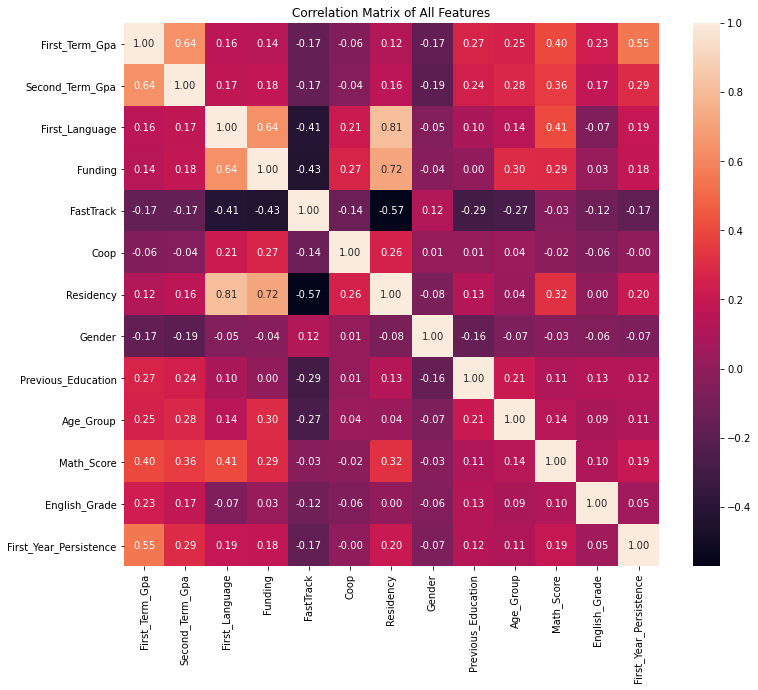

In [32]:
# Plot correlation matrix before preprocessing
corr_matrix = df_cleaned.astype(float).corr()  # Ensure all data is float for correlation
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix of All Features')
plt.show()

In [33]:
# Split the data into training and testing sets
features = df_cleaned.drop('First_Year_Persistence', axis=1)
target = df_cleaned['First_Year_Persistence'].astype('int')  # BINARY TARGET

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=42, stratify=target)


In [34]:
# Define numerical and categorical features
numerical_features = ['First_Term_Gpa', 'Second_Term_Gpa','Math_Score']
categorical_features = [col for col in features.columns if col not in numerical_features]

In [35]:
# Create transformers for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [36]:
# Combine transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [37]:
# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

In [38]:
# Save numerical and categorical features
joblib.dump(numerical_features, 'numerical_features.joblib')
joblib.dump(categorical_features, 'categorical_features.joblib')

# Save the preprocessor
joblib.dump(preprocessor, 'preprocessor.joblib')

# Save the training pipeline
joblib.dump(pipeline, 'pipeline.joblib')

['pipeline.joblib']

In [39]:
X_train_preprocessed = pipeline.fit_transform(X_train).toarray()
X_test_preprocessed = pipeline.transform(X_test).toarray()

In [40]:
# Save the split data if needed
joblib.dump(X_train_preprocessed, 'X_train_preprocessed.joblib')
joblib.dump(X_test_preprocessed, 'X_test_preprocessed.joblib')
joblib.dump(y_train, 'y_train.joblib')
joblib.dump(y_test, 'y_test.joblib')

['y_test.joblib']

In [41]:
X_train_preprocessed# Defining the model 

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_preprocessed.shape[1],)))
model.add(Dropout(0.8))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [42]:
# Early stopping and model checkpoint
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=10)
mc = ModelCheckpoint('best_model_sec2.h5', monitor='val_accuracy', mode='max', verbose=2, save_best_only=True)

In [43]:
# Train the model
history = model.fit(X_train_preprocessed, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=mc)

Epoch 1/100
15/29 [==============>...............] - ETA: 0s - loss: 0.8993 - accuracy: 0.5625 
Epoch 1: val_accuracy improved from -inf to 0.82379, saving model to best_model_sec2.h5
29/29 [==============================] - 2s 23ms/step - loss: 0.8774 - accuracy: 0.5635 - val_loss: 0.5628 - val_accuracy: 0.8238
Epoch 2/100
21/29 [====================>.........] - ETA: 0s - loss: 0.7399 - accuracy: 0.6250

C:\Users\User\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_accuracy did not improve from 0.82379
29/29 [==============================] - 0s 8ms/step - loss: 0.7303 - accuracy: 0.6387 - val_loss: 0.5272 - val_accuracy: 0.8238
Epoch 3/100
25/29 [========================>.....] - ETA: 0s - loss: 0.6826 - accuracy: 0.6662
Epoch 3: val_accuracy did not improve from 0.82379
29/29 [==============================] - 0s 8ms/step - loss: 0.6903 - accuracy: 0.6685 - val_loss: 0.5021 - val_accuracy: 0.8238
Epoch 4/100
21/29 [====================>.........] - ETA: 0s - loss: 0.6101 - accuracy: 0.7277
Epoch 4: val_accuracy did not improve from 0.82379
29/29 [==============================] - 0s 14ms/step - loss: 0.6172 - accuracy: 0.7182 - val_loss: 0.4870 - val_accuracy: 0.8238
Epoch 5/100
24/29 [=======================>......] - ETA: 0s - loss: 0.5758 - accuracy: 0.7643
Epoch 5: val_accuracy did not improve from 0.82379
29/29 [==============================] - 0s 11ms/step - loss: 0.5795 - accuracy: 0.7591 - val_loss: 0.4762 - val_accuracy:

29/29 [==============================] - 0s 7ms/step - loss: 0.4495 - accuracy: 0.8188 - val_loss: 0.3784 - val_accuracy: 0.8414
Epoch 32/100
19/29 [==================>...........] - ETA: 0s - loss: 0.4411 - accuracy: 0.8076
Epoch 32: val_accuracy did not improve from 0.84141
29/29 [==============================] - 0s 5ms/step - loss: 0.4282 - accuracy: 0.8166 - val_loss: 0.3784 - val_accuracy: 0.8370
Epoch 33/100
15/29 [==============>...............] - ETA: 0s - loss: 0.4081 - accuracy: 0.8229
Epoch 33: val_accuracy did not improve from 0.84141
29/29 [==============================] - 0s 5ms/step - loss: 0.4139 - accuracy: 0.8276 - val_loss: 0.3774 - val_accuracy: 0.8414
Epoch 34/100
19/29 [==================>...........] - ETA: 0s - loss: 0.4044 - accuracy: 0.8421
Epoch 34: val_accuracy did not improve from 0.84141
29/29 [==============================] - 0s 5ms/step - loss: 0.4195 - accuracy: 0.8254 - val_loss: 0.3748 - val_accuracy: 0.8370
Epoch 35/100
19/29 [==================>.

29/29 [==============================] - 0s 8ms/step - loss: 0.3579 - accuracy: 0.8519 - val_loss: 0.3754 - val_accuracy: 0.8634
Epoch 61/100
20/29 [===================>..........] - ETA: 0s - loss: 0.3468 - accuracy: 0.8641
Epoch 61: val_accuracy did not improve from 0.87225
29/29 [==============================] - 0s 6ms/step - loss: 0.3456 - accuracy: 0.8619 - val_loss: 0.3780 - val_accuracy: 0.8590
Epoch 62/100
26/29 [=========================>....] - ETA: 0s - loss: 0.3934 - accuracy: 0.8474
Epoch 62: val_accuracy did not improve from 0.87225
29/29 [==============================] - 0s 7ms/step - loss: 0.3872 - accuracy: 0.8530 - val_loss: 0.3736 - val_accuracy: 0.8634
Epoch 63/100
28/29 [===========================>..] - ETA: 0s - loss: 0.3572 - accuracy: 0.8438
Epoch 63: val_accuracy did not improve from 0.87225
29/29 [==============================] - 0s 7ms/step - loss: 0.3560 - accuracy: 0.8453 - val_loss: 0.3755 - val_accuracy: 0.8678
Epoch 64/100
15/29 [==============>.....

28/29 [===========================>..] - ETA: 0s - loss: 0.3542 - accuracy: 0.8560
Epoch 90: val_accuracy did not improve from 0.87225
29/29 [==============================] - 0s 6ms/step - loss: 0.3520 - accuracy: 0.8575 - val_loss: 0.3864 - val_accuracy: 0.8458
Epoch 91/100
27/29 [==========================>...] - ETA: 0s - loss: 0.3333 - accuracy: 0.8611
Epoch 91: val_accuracy did not improve from 0.87225
29/29 [==============================] - 0s 6ms/step - loss: 0.3395 - accuracy: 0.8586 - val_loss: 0.3875 - val_accuracy: 0.8590
Epoch 92/100
14/29 [=============>................] - ETA: 0s - loss: 0.3521 - accuracy: 0.8638
Epoch 92: val_accuracy did not improve from 0.87225
29/29 [==============================] - 0s 6ms/step - loss: 0.3339 - accuracy: 0.8641 - val_loss: 0.3928 - val_accuracy: 0.8546
Epoch 93/100
16/29 [===============>..............] - ETA: 0s - loss: 0.2978 - accuracy: 0.8770
Epoch 93: val_accuracy did not improve from 0.87225
29/29 [===========================

In [44]:
# Load the best model based on validation accuracy
best_model = load_model('best_model_sec2.h5')

In [45]:
# Evaluate the model on the preprocessed test data
test_error, test_accuracy = best_model.evaluate(X_test_preprocessed, y_test, verbose=2)
print(f'Test accuracy: {test_accuracy}')

9/9 - 0s - loss: 0.3678 - accuracy: 0.8732 - 177ms/epoch - 20ms/step
Test accuracy: 0.8732394576072693


Text(0, 0.5, 'Accuracy')

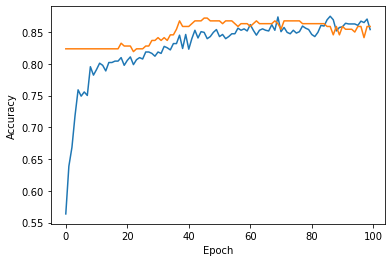

In [46]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

In [47]:
# Save the best model 
best_model.save('best_model.h5')

In [48]:
# Saving  X_test and y_test data
df_cleaned.to_csv('df_student_cleaned.csv', index=False)